# **Random Forest**

Random Forest (RF) is an ensemble learning method that creates multiple decision trees and combines their outputs to improve the overall performance and reduce the risk of overfitting. It randomly selects subsets of features and data points to create each tree, and uses bagging to aggregate the results. It is a popular and powerful algorithm in the field of machine learning and data science.


1. Import/install the necessary packages
2. Create a dataframe with three variables: Salary, Gender, and Experience
3. Convert the categorical variable (Gender) to dummy variables
4. Separate the features (Gender, Exp) and the target variable (Salary)
5. Split the data into train and test sets (80:20)


6. Define the random forest model and fit the RF model on the train data
7. Evaluate the model on the test set
8. Obtain the feature importances and plot them


9. Define the RF model with OOB, fit the RF model using the train data, evaluate the OOB scores, and plot the feature importance


10. Define the hyperparameters to tune (number of trees)
11. Define the scoring metric
12. Perform the Grid Search with cross-validation
13. Evaluate the model on the test data set
14. Display the best hyperparameters and corresponding R2 and MSE scores
15. Obtain the feature importances and plot them
16. Display the decision tree (first tree in the forest)


17. Perform a Grid Search using the RF model with OOB. Evaluate the model on the test data set, display the best hyperparameters, R2, and MSE, also display the OOB score, R2, and MSE. Obtain the feature importance and a sample tree.


18. Use Random Search instead of Grid Search. Evaluate the model on the test data set, display the best hyperparameters, R2, and MSE. Obtain the feature importance and a sample tree.



**Import/install the necessary packages**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


**Create a dataframe with three variables: Salary, Gender, and Experience**

In [ ]:
# load data
df = pd.DataFrame({
    'Salary': [1000, 1500, 2000, 2500, 3000, 500, 1000, 1250, 1750, 2000, 1000, 1500, 2000, 2500, 3000, 500, 1000, 1250, 1750, 2000],
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female','Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female'],
    'Exp': [2, 3, 4, 5, 6, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 4, 5, 6, 7, 8]
})

**Convert the categorical variable (Gender) to dummy variables**

In [ ]:
df = pd.get_dummies(df, drop_first=True)

**Separate the features (Gender, Exp) and the target variable (Salary)**

In [ ]:
X = df.drop(['Salary'], axis=1)
y = df['Salary']

**Split the data into train and test sets (80:20)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Define the random forest model and fit the RF model on the train data**

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Evaluate the model on the test set**

In [ ]:
y_pred = rf_model.predict(X_test)
print('Test R2 score:', r2_score(y_test, y_pred))
print('Test MSE score:', mean_squared_error(y_test, y_pred))

Test R2 score: 0.7823885714285714
Test MSE score: 29751.5625


**Obtain the feature importances and plot them**

Exp            0.610349
Gender_Male    0.389651
dtype: float64


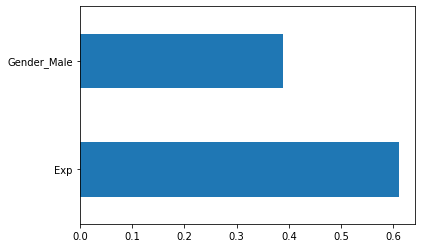

In [ ]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

**Define the RF model with OOB, fit the RF model using the train data, evaluate the OOB scores, and plot the feature importance**

OOB R2 score: 0.8583644851864685
OOB MSE score: 71059.81028852718
Exp            0.610349
Gender_Male    0.389651
dtype: float64


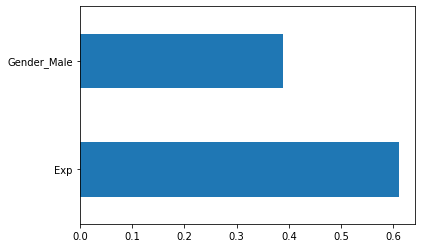

In [ ]:
# RF Model
rf_modelWithoob = RandomForestRegressor(random_state=42, oob_score=True)

# RF model fit with OOB
rf_modelWithoob.fit(X_train, y_train)

# Evaluate OOB score
print('OOB R2 score:', rf_modelWithoob.oob_score_)
print('OOB MSE score:', mean_squared_error(y_train, rf_modelWithoob.oob_prediction_))

# Obtain feature importances and plot them
importances = pd.Series(rf_modelWithoob.feature_importances_, index=X.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

**Define the hyperparameters to tune (number of trees)**

In [ ]:
param_grid = {
    'n_estimators': [5, 10, 15, 20]
    #,'max_depth': [None, 2, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2']
}

**To define all the hyperparameters to tune, use the following snippet**

param_grid = {
    'n_estimators': [5, 10, 15, 20],
    'max_depth': [None, 2, 5, 10], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['auto', 'sqrt', 'log2']
}

**Define the scoring metric**

In [ ]:
scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
print(scoring)



{'R2': 'r2', 'MSE': 'neg_mean_squared_error'}


**Perform the Grid Search with cross-validation**

In [ ]:
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring=scoring, refit='R2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': [5, 10, 15, 20]}, refit='R2',
             scoring={'MSE': 'neg_mean_squared_error', 'R2': 'r2'})

**Evaluate the model on the test data set**

In [ ]:
y_pred = grid_search.predict(X_test)
print('Test R2 score:', r2_score(y_test, y_pred))
print('Test MSE score:', mean_squared_error(y_test, y_pred))

Test R2 score: 0.656
Test MSE score: 47031.25


**Display the best hyperparameters and corresponding R2 and MSE scores**

In [ ]:
print('Best hyperparameters:', grid_search.best_params_)
print('Best R2 score:', grid_search.best_score_)
print('Best MSE score:', abs(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))

Best hyperparameters: {'n_estimators': 10}
Best R2 score: 0.7066944598462966
Best MSE score: 84989.58333333333


**Obtain the feature importances and plot them**

Exp            0.550156
Gender_Male    0.449844
dtype: float64


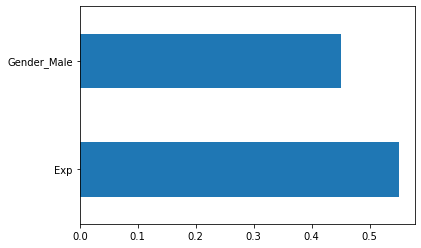

In [ ]:
importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

**Diaplay the decision tree** (first tree in the forest)

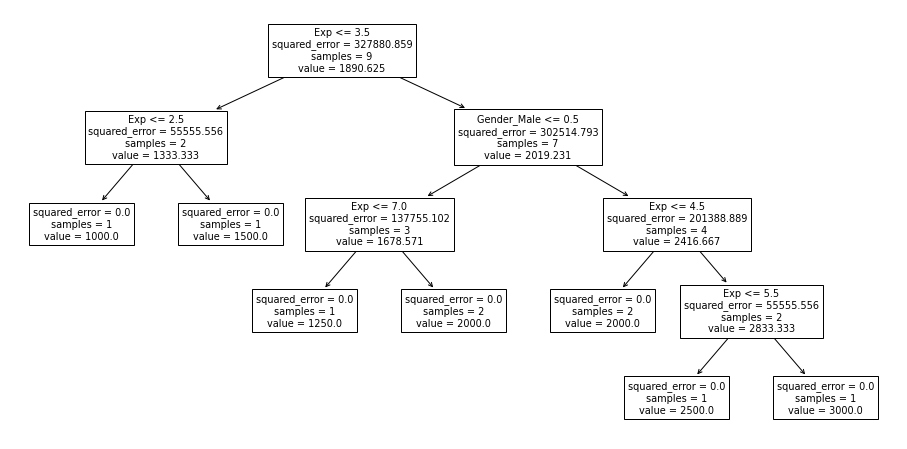

In [ ]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(16, 8))
plot_tree(grid_search.best_estimator_[0], ax=ax, feature_names=X_train.columns)
plt.show()

**Perform a Grid Search using the RF model with OOB. Evaluate the model on the test data set, display the best hyperparameters, R2, and MSE, also display the OOB score, R2, and MSE. Obtain the feature importance and a sample tree.**

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Test R2 score: 0.656
Test MSE score: 47031.25


Best hyperparameters: {'n_estimators': 10}
Best R2 score: 0.7066944598462966
Best MSE score: 84989.58333333333


OOB score: 0.8201092187077589
OOB MSE score: 90252.82118055553
OOB R2 score: 0.8201092187077589


Feature importances based on OOB:
Exp            0.550156
Gender_Male    0.449844
dtype: float64


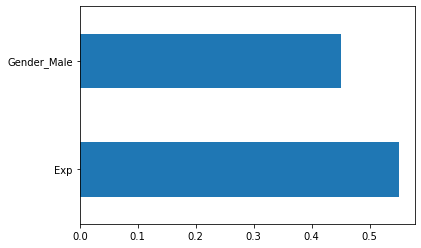

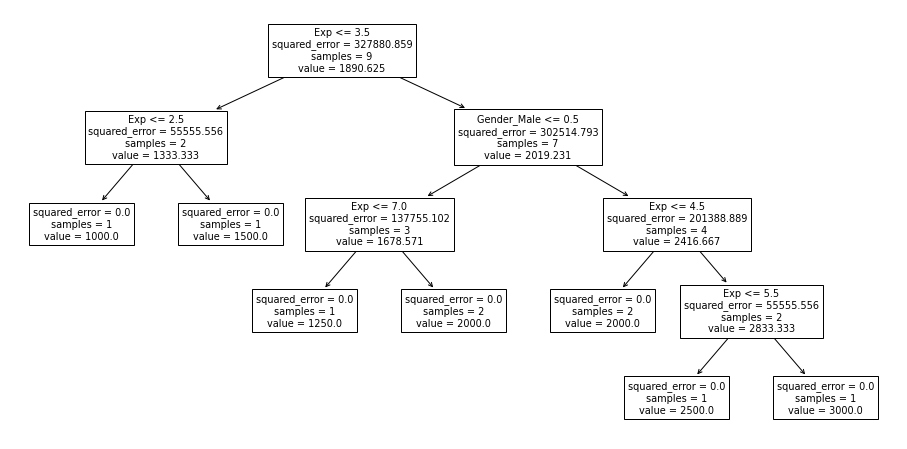

In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_modelWithoob, param_grid=param_grid, cv=5, scoring=scoring, refit='R2')
grid_search.fit(X_train, y_train)

# Evaluate model on test set
y_pred = grid_search.predict(X_test)
print('Test R2 score:', r2_score(y_test, y_pred))
print('Test MSE score:', mean_squared_error(y_test, y_pred))
print('\n')

# Display best hyperparameters and corresponding R2 and MSE scores
print('Best hyperparameters:', grid_search.best_params_)
print('Best R2 score:', grid_search.best_score_)
print('Best MSE score:', abs(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print('\n')

# Display OOB score and related statistics
print('OOB score:', grid_search.best_estimator_.oob_score_)
oob_predictions = grid_search.best_estimator_.oob_prediction_
print('OOB MSE score:', mean_squared_error(y_train, oob_predictions))
print('OOB R2 score:', r2_score(y_train, oob_predictions))
print('\n')

# Obtain feature importances and plot them
importances_oob = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
print('Feature importances based on OOB:')
print(importances_oob)
importances_oob.plot(kind='barh')
plt.show()

# Display the decision tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(16, 8))
plot_tree(grid_search.best_estimator_[0], ax=ax, feature_names=X_train.columns)
plt.show()

**Use Random Search instead of Grid Search**

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters: {'n_estimators': 10}
Best R2 score: 0.7066944598462966
Best MSE score: 84989.58333333333


Test R2 score: 0.656
Test MSE score: 47031.25


Feature importances:
Exp            0.550156
Gender_Male    0.449844
dtype: float64


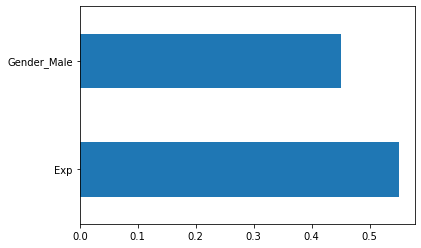

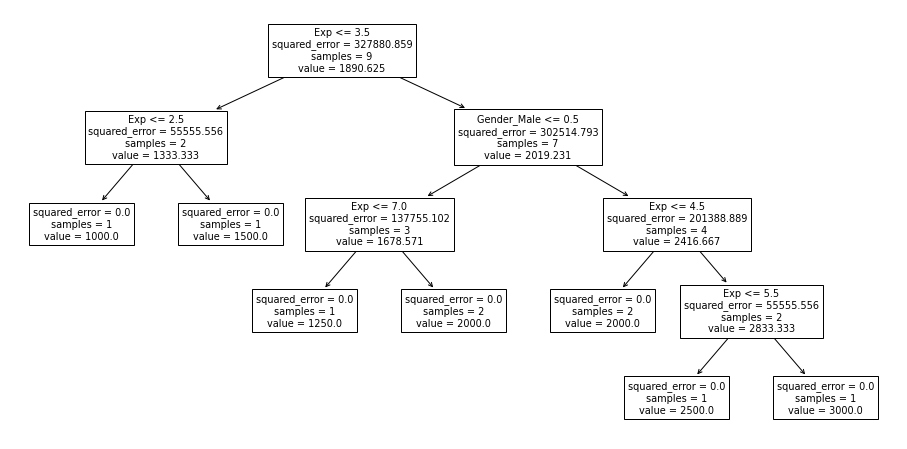

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Perform random search with cross-validation; hence, create random search object
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=20, cv=5, scoring=scoring, refit='R2')

# fit the random search object to the train data
random_search.fit(X_train, y_train)

# Display best hyperparameters and corresponding R2 and MSE scores
print('Best hyperparameters:', random_search.best_params_)
print('Best R2 score:', random_search.best_score_)
print('Best MSE score:', abs(random_search.cv_results_['mean_test_MSE'][random_search.best_index_]))
print('\n')

# fit the model with the best parameters on the entire training set
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# evaluate the best model on the test set
y_pred = best_model.predict(X_test)
print("Test R2 score:", r2_score(y_test, y_pred))
print("Test MSE score:", mean_squared_error(y_test, y_pred))
print('\n')

# Obtain feature importances and plot them
importances = pd.Series(random_search.best_estimator_.feature_importances_, index=X.columns)
print('Feature importances:')
print(importances)
importances.plot(kind='barh')
plt.show()

# Display the decision tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(16, 8))
plot_tree(random_search.best_estimator_[0], ax=ax, feature_names=X_train.columns)
plt.show()

**Exercise**

Run the lab by modifiying the grid search with the following snippet:

In [1]:
param_grid = {
    'n_estimators': [5, 10, 15, 20],
    'max_depth': [None, 2, 5, 10], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['auto', 'sqrt', 'log2']
}